# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

In [6]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


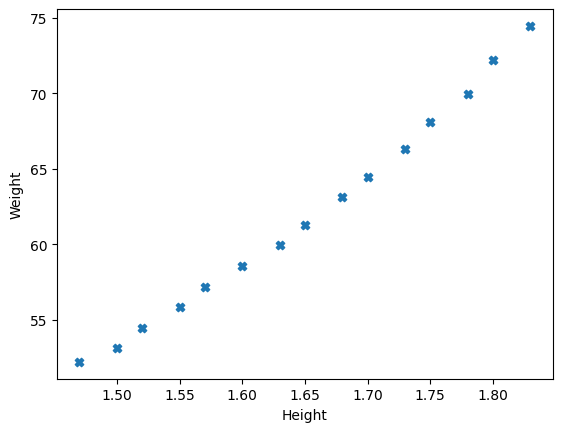

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [8]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [9]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.model = SGDRegressor(learning_rate='constant', eta0=self.lr, max_iter=self.epochs)
        self.scaler = StandardScaler()

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        # Standardize the features
        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)

    def update_weights(self, X, y):
        """
        This method is not required as we use SGDRegressor which updates weights internally.
        """
        pass

    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled)


### Build the model and train on the dataset.

In [10]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [11]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    return np.mean((y_actual-y_pred)**2)


### Make predictions using the model and evaluate it.

In [12]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5005


### Plot the predicted and the actual values.

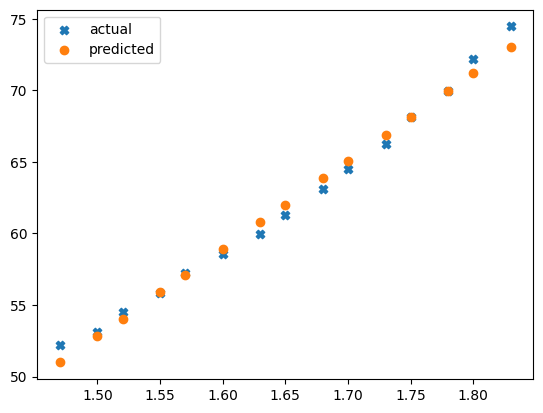

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Copy of advertise.csv')

In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [18]:
######################
#   YOUR CODE HERE   #
#####################
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

### Split the data into train and test set.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [20]:
from sklearn.metrics import mean_squared_error

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Train MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the heights dataset
df_heights = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

# Preprocess the data
X_heights = df_heights[['Height']].values
y_weights = df_heights['Weight'].values

# Normalize the features
X_heights_scaled = scaler.fit_transform(X_heights)

# Split the data into training and test sets
X_train_heights, X_test_heights, y_train_weights, y_test_weights = train_test_split(X_heights_scaled, y_weights, test_size=0.2, random_state=42)

# Initialize the model
model_heights = LinearRegression()

# Train the model
model_heights.fit(X_train_heights, y_train_weights)

# Make predictions
y_train_pred_heights = model_heights.predict(X_train_heights)
y_test_pred_heights = model_heights.predict(X_test_heights)

# Calculate MSE
train_mse_heights = mean_squared_error(y_train_weights, y_train_pred_heights)
test_mse_heights = mean_squared_error(y_test_weights, y_test_pred_heights)

print(f"Train MSE (Heights Sklearn): {train_mse_heights:.4f}")
print(f"Test MSE (Heights Sklearn): {test_mse_heights:.4f}")


Train MSE (Heights Sklearn): 0.4289
Test MSE (Heights Sklearn): 1.0030


In [24]:
###########################
### Write your code here###
###########################
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of advertise.csv')

# Extract features and target variable
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model using sklearn
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE (Sklearn): {train_mse:.4f}")
print(f"Test MSE (Sklearn): {test_mse:.4f}")


Train MSE (Sklearn): 2.6761
Test MSE (Sklearn): 2.9078


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [31]:
# Prepare the features and target variable
X = np.array(df['Height']).reshape(-1, 1)
y = np.array((df['Weight'] >= 60).astype(int))

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Build the model and train on the dataset.

In [35]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)



In [36]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 1.0000


### Plot the predicted and the actual values.

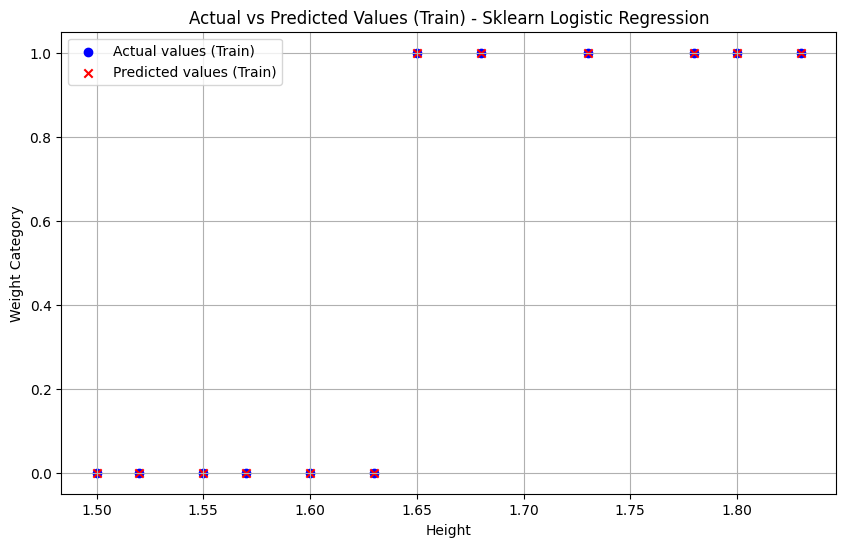

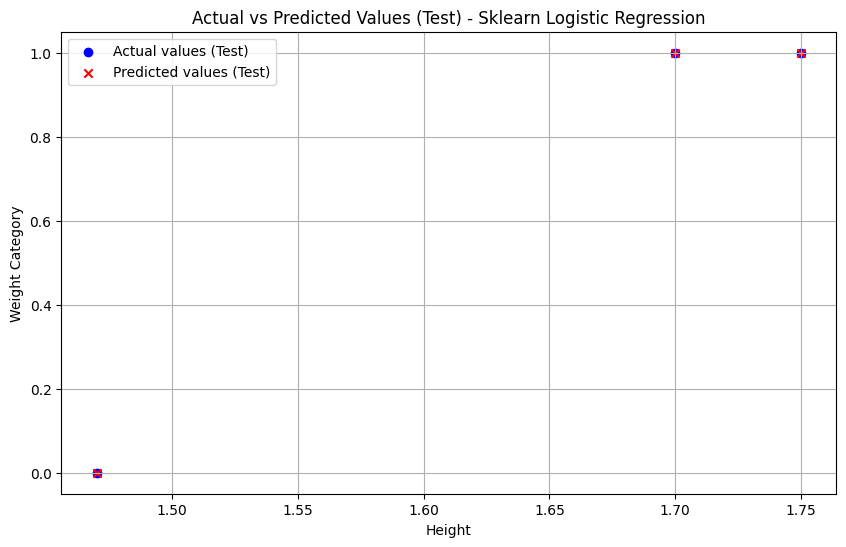

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual values (Train)')
plt.scatter(X_train, y_train_pred, color='red', marker='x', label='Predicted values (Train)')
plt.title('Actual vs Predicted Values (Train) - Sklearn Logistic Regression')
plt.xlabel('Height')
plt.ylabel('Weight Category')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values (Test)')
plt.scatter(X_test, y_test_pred, color='red', marker='x', label='Predicted values (Test)')
plt.title('Actual vs Predicted Values (Test) - Sklearn Logistic Regression')
plt.xlabel('Height')
plt.ylabel('Weight Category')
plt.legend()
plt.grid(True)
plt.show()


# ** Use the Newton Raphson Method for the same** (75 marks)


In [40]:
#####################
#   YOUR CODE HERE   #
######################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

# Prepare the features and target variable
X = np.array(df['Height']).reshape(-1, 1)
y = np.array((df['Weight'] >= 60).astype(int))  # Ensure binary targets

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model using Newton-Raphson method
model = LogisticRegression(solver='newton-cg', max_iter=10000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")




Train Accuracy: 1.0000
Test Accuracy: 1.0000


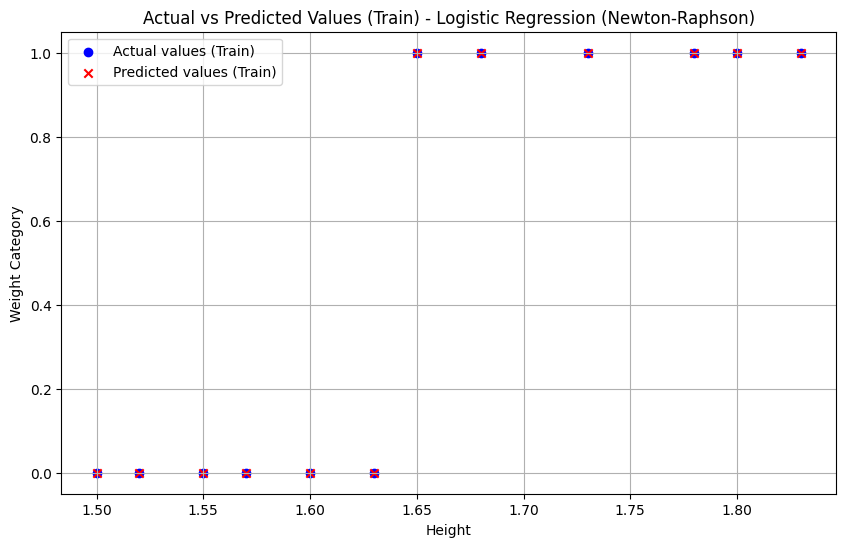

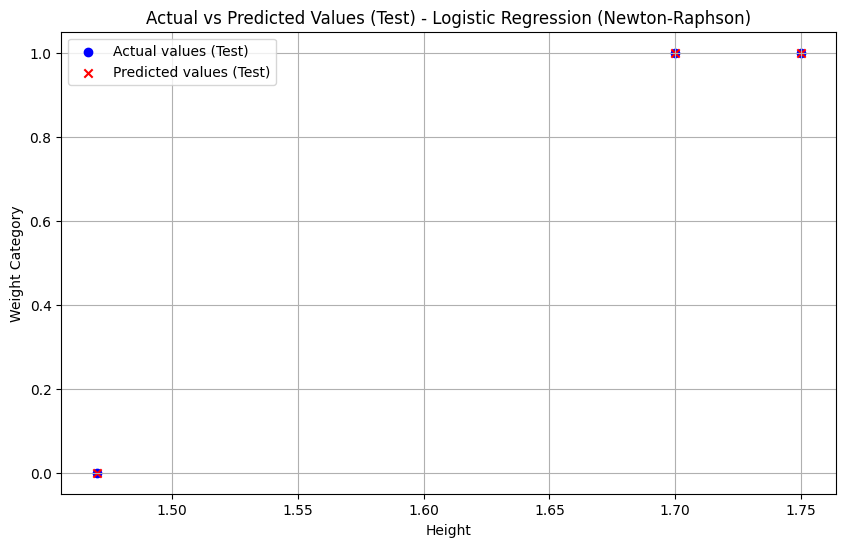

In [41]:
#####################
#   YOUR CODE HERE   #
######################
# Plot the actual vs predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual values (Train)')
plt.scatter(X_train, y_train_pred, color='red', marker='x', label='Predicted values (Train)')
plt.title('Actual vs Predicted Values (Train) - Logistic Regression (Newton-Raphson)')
plt.xlabel('Height')
plt.ylabel('Weight Category')
plt.legend()
plt.grid(True)
plt.show()

# Plot the actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values (Test)')
plt.scatter(X_test, y_test_pred, color='red', marker='x', label='Predicted values (Test)')
plt.title('Actual vs Predicted Values (Test) - Logistic Regression (Newton-Raphson)')
plt.xlabel('Height')
plt.ylabel('Weight Category')
plt.legend()
plt.grid(True)
plt.show()

# K Means Clustering(100 marks)



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



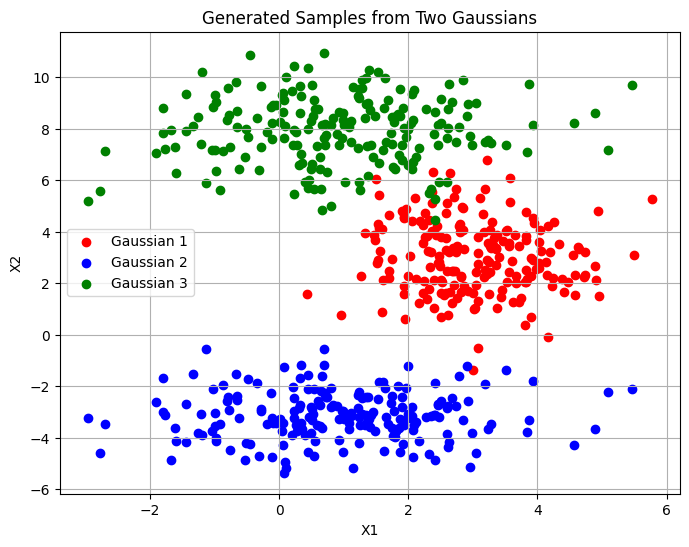

In [44]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


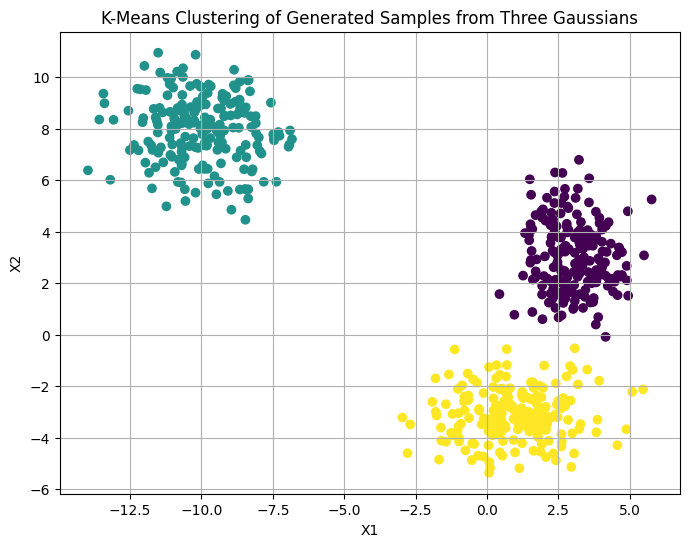

In [45]:
#####################
#   YOUR CODE HERE   #
######################
# Combine the samples into one dataset
X = np.vstack((samples1, samples2, samples3))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the clustered samples
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Clustered data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clustering of Generated Samples from Three Gaussians')
plt.grid(True)
plt.show()